# Cabildo de Mujeres STEM - 01

Instalar wordcloud en kernel en caso que no esté instalado

In [ ]:
conda install wordcloud 

Primero cargamos las librerias necesarias para procesar texto y hacer nubes de palabras

In [7]:
import pandas as pd
import numpy as np
import string
import re
from collections import Counter
from nltk.corpus import stopwords

Cargamos el archivo con las respuestas

In [8]:
rdata = pd.read_excel("C:/Users/Monin/Documents/Rcran/STEM/respuestas_cabildo_stem_01.xlsx")

Realizamos una general revisión de los datos

In [9]:
rdata.shape
rdata.sample(3)

,ID,PREGUNTA,GRUPO,TEXTO
10,P2_03,P2,3,Se definieron 3 pilares de la sustentabilidad ...
1,P1_02,P1,2,Ser parte de los espacios para generar diálogo...
2,P1_03,P1,3,"En general, todes quisimos participar en este ..."


Definimos una función para quitar números y puntuación y dejar en minúscula cada palabra. Guardamos el texto en un nuevo campo llamado 'tokenized'

In [10]:
def clean_text(texto):
    texto= str(texto)
    clean1 = re.sub(r"[^a-z0-9]"," ",str(texto.lower()))
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', " ",str( texto.lower()))
    return re.sub(r'\W+', ' ', clean1)

rdata['tokenized'] = rdata['TEXTO'].map(lambda x: clean_text(x)) 
rdata['tokenized'].head()


0     qué nos convoca la importancia de la particip...
1    ser parte de los espacios para generar diálogo...
2    en general todes quisimos participar en este c...
3    reunirnos con otras generaciones aportar desde...
4    interés por nuestro rol como mujeres en la soc...
Name: tokenized, dtype: object

Revisamos algunas estadísticas generales y separamos los textos palabra por palabra

In [13]:
rdata['num_wds'] = rdata['tokenized'].apply(lambda x: len(x.split()))
#Alguas estadíticas
print("Promedio: %s \nMáximo: %s \nMínimo: %s" % (rdata['num_wds'].mean(), rdata['num_wds'].max(), rdata['num_wds'].min()))

Promedio: 107.91176470588235 
Máximo: 523 
Mínimo: 0


Quitamos las palabras que no aportan mayor información descriptiva

In [16]:
rdata = rdata[rdata['num_wds']>4]
rdata['uniq_wds'] = rdata['tokenized'].str.split().apply(lambda x: len(set(x)))
rdata['uniq_wds'].head()

0    33
1    32
2    55
3    60
4    38
Name: uniq_wds, dtype: int64

In [17]:
print("Promedio: %s \nMáximo: %s \nMínimo: %s" % (rdata['num_wds'].mean(), rdata['num_wds'].max(), rdata['num_wds'].min()))


Promedio: 130.85714285714286 
Máximo: 523 
Mínimo: 7


Realizamos el mapa de palabras para verlo más bonito

In [32]:
import sys
!{sys.executable} -m pip install stop_words

In [33]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from stop_words import get_stop_words

Unimos los textos para verlos de manera global y por pregunta

In [34]:
text = ' '.join(rdata['tokenized'].str.lower())

# PREGUNTA 1
rdata_p1 = rdata[rdata.PREGUNTA=='P1']
text_p1 = ' '.join(rdata_p1['tokenized'].str.lower())

# PREGUNTA 2
rdata_p2 = rdata[rdata.PREGUNTA=='P2']
text_p2 = ' '.join(rdata_p2['tokenized'].str.lower())

# PREGUNTA 3
rdata_p3 = rdata[rdata.PREGUNTA=='P3']
text_p3 = ' '.join(rdata_p3['tokenized'].str.lower())

In [ ]:
Creamos el diccionario de stopwords

In [35]:
stop_words = get_stop_words('es')
stopwords = set(stop_words) #STOPWORDS

Creamos la nubes de palabras

In [40]:
wordcloud_g  = WordCloud(stopwords=stopwords, background_color="white", max_words=500).generate(text)
wordcloud_01 = WordCloud(stopwords=stopwords, background_color="white", max_words=500).generate(text_p1)
wordcloud_02 = WordCloud(stopwords=stopwords, background_color="white", max_words=500).generate(text_p2)
wordcloud_03 = WordCloud(stopwords=stopwords, background_color="white", max_words=500).generate(text_p3)


Graficamos

NUBE DE PALABRAS GENERAL


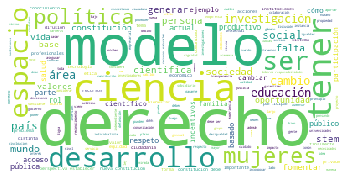

In [41]:
print("NUBE DE PALABRAS GENERAL")
plt.imshow(wordcloud_g)
plt.axis("off")
plt.show()


NUBE DE PALABRAS TEMA 1


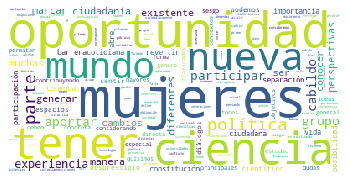

In [42]:
print("NUBE DE PALABRAS TEMA 1")
plt.imshow(wordcloud_01)
plt.axis("off")
plt.show()


NUBE DE PALABRAS TEMA 2


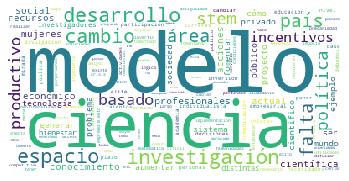

In [43]:
print("NUBE DE PALABRAS TEMA 2")
plt.imshow(wordcloud_02)
plt.axis("off")
plt.show()

NUBE DE PALABRAS TEMA 3


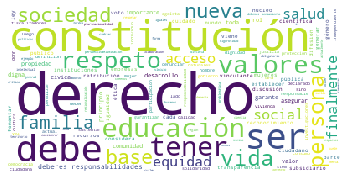

In [44]:
print("NUBE DE PALABRAS TEMA 3")
plt.imshow(wordcloud_03)
plt.axis("off")
plt.show()
